In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [12]:
data_display = pd.read_csv("parsed_alldata.csv")

print(data_display)

      WL1(mm)  WL2(mm)  WL3(mm)  WL4 (mm)  WL5 (mm)  Solar (W/m2)  \
0          65      213       94        37        43           415   
1          65      211      101        37        43           329   
2          66      211      102        36        43           115   
3          64      212       88        36        43            31   
4          65      210       95        36        43             1   
...       ...      ...      ...       ...       ...           ...   
1425       39       41       41        36        44           665   
1426       39       41       41        36        43           557   
1427       39       41       41        37        44           395   
1428       39       41       41        36        43           208   
1429       39       41       41        36        44            44   

      Precipitation (mm)  AirTemp (DegC)  RH (%)  PD (mm)  
0                  0.000            34.0      51     70.5  
1                  0.000            33.5      67   

In [40]:
learning_rate = 0.001
trainning_steps = 200000
display_step = 10000

w1_pred = 0
w2_pred = 0

In [41]:
data = np.loadtxt("parsed_alldata_np.csv", delimiter = ',', dtype = np.float32)

x_train = data[:1200, :9]
x_test = data[1200:, :9]

y_train = data[:1200, [-1]]
y_test = data[1200:, [-1]]

w1 = tf.Variable(tf.random.uniform([9, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([9, 1], 0, 1))

bias = tf.Variable(random.random())

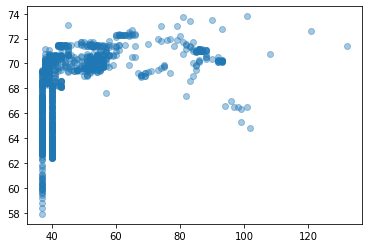

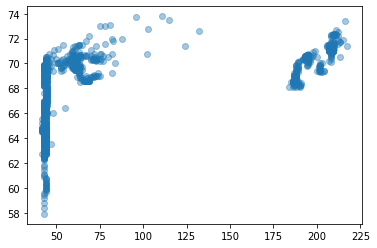

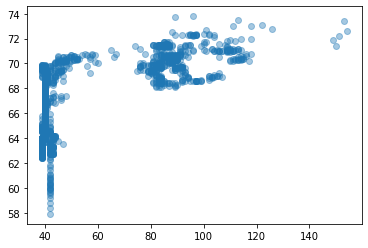

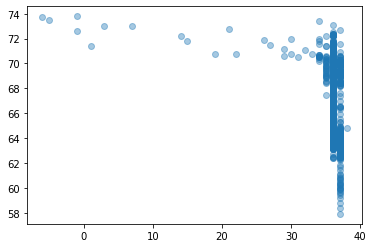

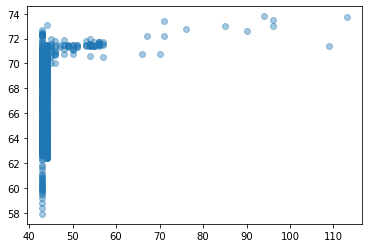

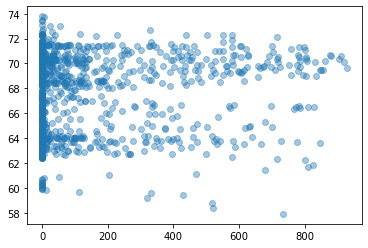

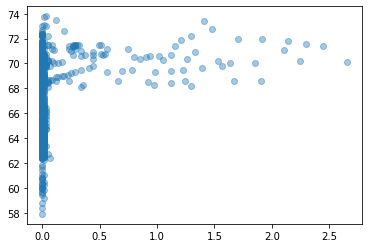

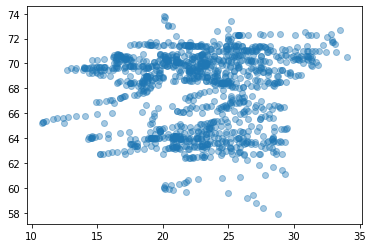

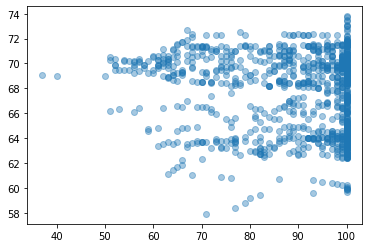

In [42]:
for i in range(9):
    plt.scatter(x_train[:, [i]], y_train, alpha=0.4)
    plt.show()

In [43]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

In [44]:
optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w1:', w1.numpy(), '\n', 'w2:', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w1_pred = w1.numpy()
        w2_pred = w2.numpy()

step: 10000 
 w1: [[ 0.02821206]
 [ 0.00494776]
 [-0.00207557]
 [-0.45253295]
 [-0.11891659]
 [ 0.00138313]
 [ 0.6415238 ]
 [-0.12116241]
 [ 0.09406198]] 
 w2: [[ 0.1402918 ]
 [-0.3485335 ]
 [ 0.05469231]
 [ 0.16089243]
 [-0.09496582]
 [-0.36041716]
 [ 0.20519361]
 [ 0.4740694 ]
 [-0.04893094]] 
 bias: -0.12975067 
 loss: 33640.22 

step: 20000 
 w1: [[-2.3493827e-03]
 [ 7.2116673e-04]
 [-1.1558175e-03]
 [ 2.1755174e-03]
 [ 2.2161235e-03]
 [ 3.3397703e-06]
 [-4.9299348e-02]
 [-1.3660394e-02]
 [-3.6592729e-04]] 
 w2: [[ 0.35787192]
 [-0.19000575]
 [ 0.26696035]
 [ 0.6070988 ]
 [ 0.2018385 ]
 [-0.00108347]
 [-0.9420725 ]
 [ 0.6750369 ]
 [ 0.11013171]] 
 bias: 0.255313 
 loss: 6.6823645 

step: 30000 
 w1: [[-2.7135699e-03]
 [ 2.0429380e-04]
 [-1.7270147e-03]
 [-5.7398705e-03]
 [ 4.1917796e-04]
 [ 1.6081970e-06]
 [ 1.3465004e-01]
 [-1.5841734e-02]
 [-1.0148108e-03]] 
 w2: [[ 4.1247791e-01]
 [-5.5700418e-02]
 [ 3.1772903e-01]
 [ 6.5704405e-01]
 [ 2.8409237e-01]
 [-3.8645280e-04]
 [-2.06927

In [45]:
y_hat = tf.matmul(x_test * x_test, w1_pred) + tf.matmul(x_test, w2_pred) + bias

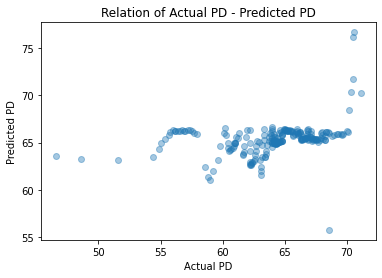

In [46]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [47]:
def rmse(x_test, y_test):
    y_hat = tf.matmul(x_test * x_test, w1_pred) + tf.matmul(x_test, w2_pred) + bias
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

print(rmse(x_test, y_test))

3.8939993
